### Random Forest Regressor
Ensemble Learning: Combines multiple decision trees (Bagging) to produce a more accurate and stable prediction.

Reduced Overfitting: By averaging the results of many trees, it significantly reduces the variance and overfitting issues found in single decision trees.

Feature Importance: Naturally identifies which features have the most significant impact on predicting the target variable.

Robustness: Highly effective on large datasets and handles missing values or outliers well through its democratic voting/averaging process.


--- Random Forest Regressor (Sampled) Performance ---
MAE: 6.8011
MSE: 72.5950
RMSE: 8.5203
R2 Score: 0.2411
Adjusted R2: 0.2408

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


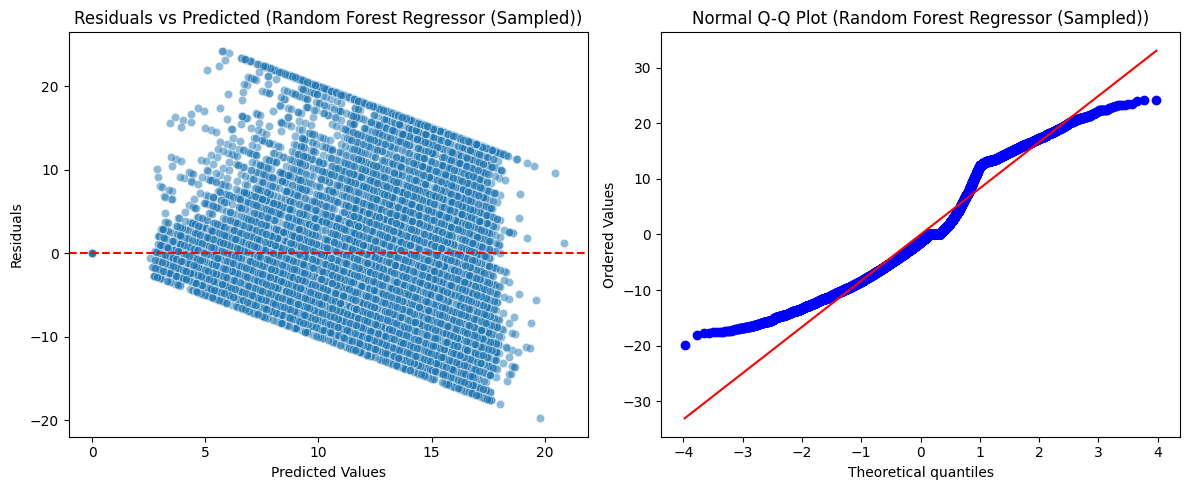

6300

In [ ]:
# --- MODEL: Random Forest Regressor ---
# Note: Training on 10M rows with RF causes RAM crashes.
# We use a strategic sample (200k) to maintain performance and speed.

# 1. Creating a specific sample for Random Forest
rf_limit = 200000
X_train_rf = X_train_scaled[:rf_limit]
y_train_rf = y_train[:rf_limit]
X_test_rf = X_test_scaled[:20000] # Representative test sample
y_test_rf = y_test[:20000]

# Defining the model
# English Comment: n_jobs=-1 uses all CPU cores for faster training
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# 2. Training on the SAMPLE (X_train_rf)
# English Comment: Fitting on 200k samples for optimal training time
rf_reg.fit(X_train_rf, y_train_rf)

# 3. Predicting on the SAMPLE (X_test_rf)
rf_pred = rf_reg.predict(X_test_rf)

# 4. Numerical Evaluation
evaluate_regression("Random Forest Regressor (Sampled)", y_test_rf, rf_pred, X_test_rf)

# --- CRITICAL RAM Optimization ---
# English Comment: Deleting specific RF arrays to free memory
del rf_reg, rf_pred, X_train_rf, y_train_rf, X_test_rf, y_test_rf
gc.collect()